In [3]:
%load_ext autoreload
%autoreload 2

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
import logging
from cabam import CABAM
from cabam.utils import dataset_summary

logging.basicConfig(level=logging.INFO)
model = CABAM()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Constant, low assortativity (|C| = 2)

100%|██████████| 5000/5000 [00:20<00:00, 244.14it/s]


Calculating best minimal value for power law fit
(2.9905442920824328, 22.0)
Theoretical intra-class ratio: 0.05


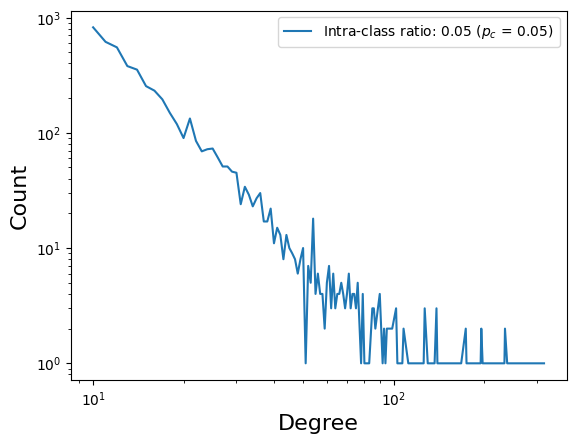

100%|██████████| 100/100 [00:00<00:00, 3668.27it/s]


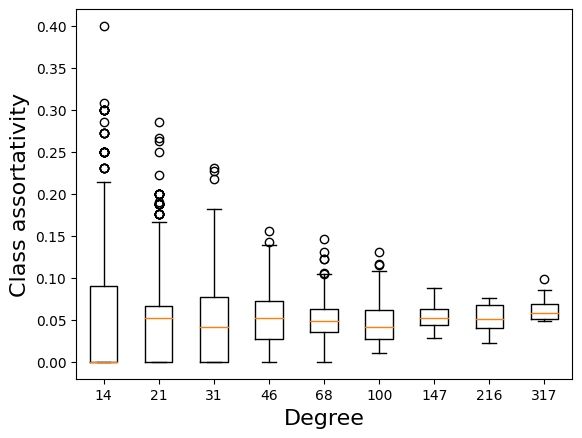

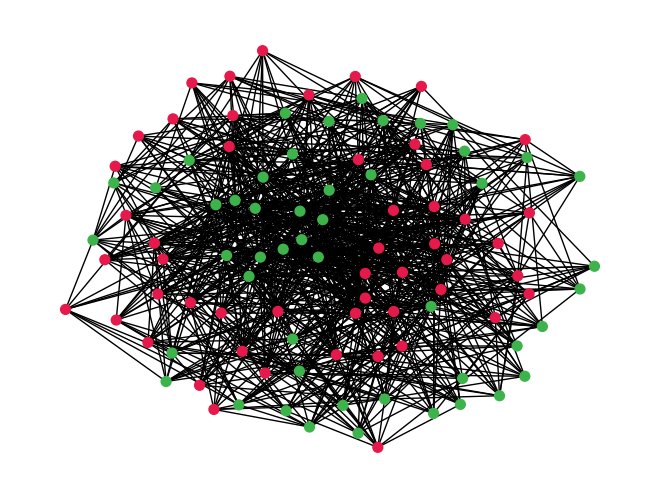

In [4]:
native_class_probs = [0.5, 0.5]  # using balanced class probs
n = 5000  # grow graph to size of 5000 nodes
m = 10  # each node added connects to m other nodes
num_classes = 2  # there are num_classes classes

# constant setting for fixed assortativity constant p_c throughout the graph
p_c = 0.05 # probability for two nodes of the same class to connect
constant_inter_intra_link_probs = {1: p_c, 0: 1 - p_c}

G, node_degrees, node_labels, intra_class, inter_class = model.generate_graph(
    n=n,
    m=m,
    num_classes=num_classes,
    native_class_probs=native_class_probs,
    inter_intra_link_probs=constant_inter_intra_link_probs
)

# plot the degree distribution and count of intra/inter-class edges
print(dataset_summary.test_degree_distribution([d for n, d in nx.degree(G)]))
ctr = Counter([d for n, d in nx.degree(G)])
degs = sorted(ctr.items())
plt.loglog([deg for (deg, ct) in degs], 
           [ct for (deg, ct) in degs], 
           label=r'Intra-class ratio: {:.2f} ($p_c$ = {:.2f}) '.format(intra_class / (inter_class + intra_class), p_c))
print('Theoretical intra-class ratio:', model.get_theoretical_intra_class_estimates(
    inter_intra_link_probs=constant_inter_intra_link_probs,
    native_class_probs=native_class_probs,
    m=m)
)
plt.xlabel('Degree', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.legend()
plt.show()

# plot label homophily varying over degrees
dataset_summary.plot_degree_label_assortativity(G=G, y=node_labels)


# plot a small snapshot of the graph generation itself (for efficiency reasons)
G_s, _, node_labels_s, _, _ = model.generate_graph(
    n=100,
    m=m,
    num_classes=num_classes,
    native_class_probs=native_class_probs,
    inter_intra_link_probs=constant_inter_intra_link_probs
)

plt.figure()
dataset_summary.draw_network_with_labels(G=G_s, node_labels=node_labels_s)

## Constant, high assortativity (|C| = 2)

100%|██████████| 5000/5000 [00:20<00:00, 243.96it/s]


Calculating best minimal value for power law fit
(2.9933754305660587, 18.0)
Theoretical intra-class ratio: 0.95


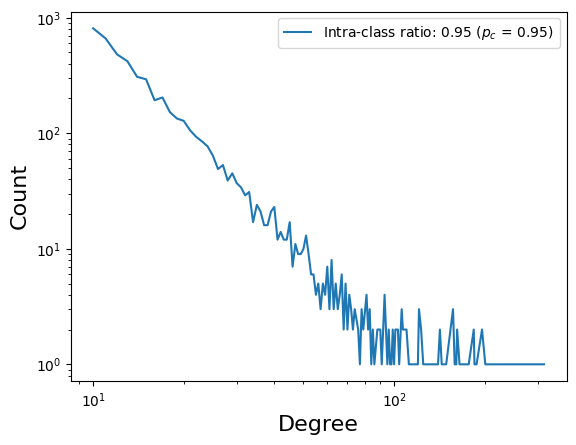

100%|██████████| 100/100 [00:00<00:00, 3525.84it/s]


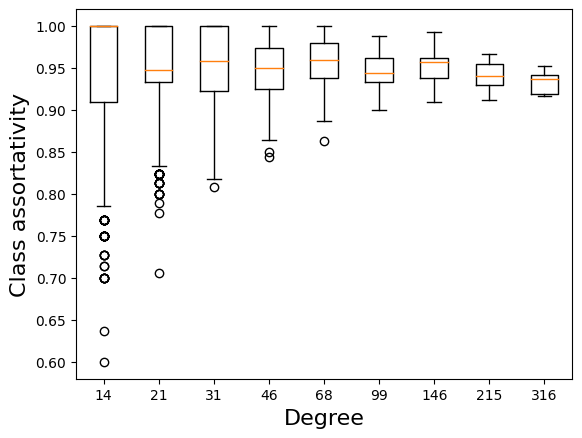

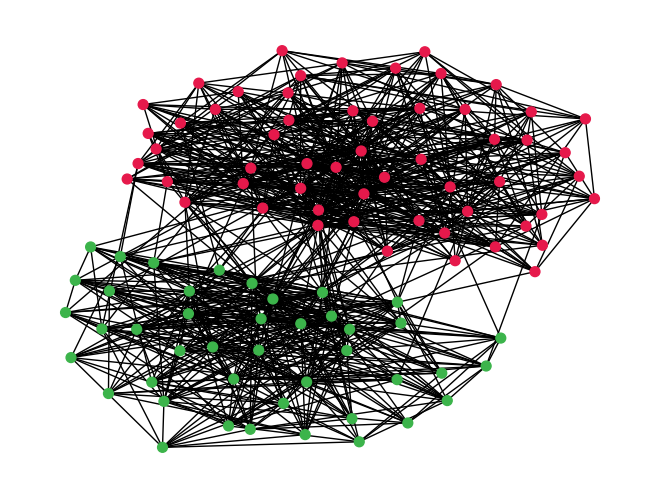

In [6]:
native_class_probs = [0.5, 0.5]  # using balanced class probs
n = 5000  # grow graph to size of 5000 nodes
m = 10  # each node added connects to m other nodes
num_classes = 2  # there are num_classes classes

# constant setting for fixed assortativity constant p_c throughout the graph
p_c = 0.95 # probability for two nodes of the same class to connect
constant_inter_intra_link_probs = {1: p_c, 0: 1 - p_c}

G, node_degrees, node_labels, intra_class, inter_class = model.generate_graph(
    n=n, 
    m=m, 
    num_classes=num_classes,
    native_class_probs=native_class_probs,
    inter_intra_link_probs=constant_inter_intra_link_probs
)

# plot the degree distribution and count of intra/inter-class edges
print(dataset_summary.test_degree_distribution([d for n, d in nx.degree(G)]))
ctr = Counter([d for n, d in nx.degree(G)])
degs = sorted(ctr.items())
plt.loglog([deg for (deg, ct) in degs], 
           [ct for (deg, ct) in degs], 
           label=r'Intra-class ratio: {:.2f} ($p_c$ = {:.2f}) '.format(intra_class / (inter_class + intra_class), p_c))
print('Theoretical intra-class ratio:', model.get_theoretical_intra_class_estimates(
    inter_intra_link_probs=constant_inter_intra_link_probs,
    native_class_probs=native_class_probs,
    m=m)
)
plt.xlabel('Degree', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.legend()
plt.show()

# plot label homophily varying over degrees
dataset_summary.plot_degree_label_assortativity(G, node_labels)


# plot a small snapshot of the graph generation itself (for efficiency reasons)
G_s, _, node_labels_s, _, _ = model.generate_graph(
    n=100,
    m=m,
    num_classes=num_classes,
    native_class_probs=native_class_probs,
    inter_intra_link_probs=constant_inter_intra_link_probs
)
plt.figure()
dataset_summary.draw_network_with_labels(G=G_s, node_labels=node_labels_s)

## Degree-varying, high assortativity (|C| = 2)

100%|██████████| 5000/5000 [00:23<00:00, 216.63it/s]


Calculating best minimal value for power law fit
(2.9665311565265196, 21.0)
Theoretical intra-class ratio: 0.8418477845336887


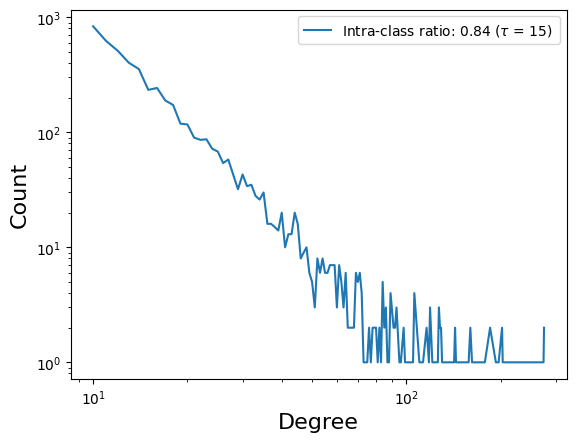

100%|██████████| 100/100 [00:00<00:00, 3499.34it/s]


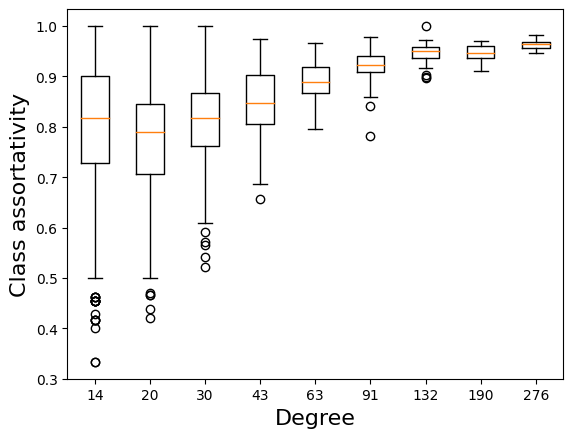

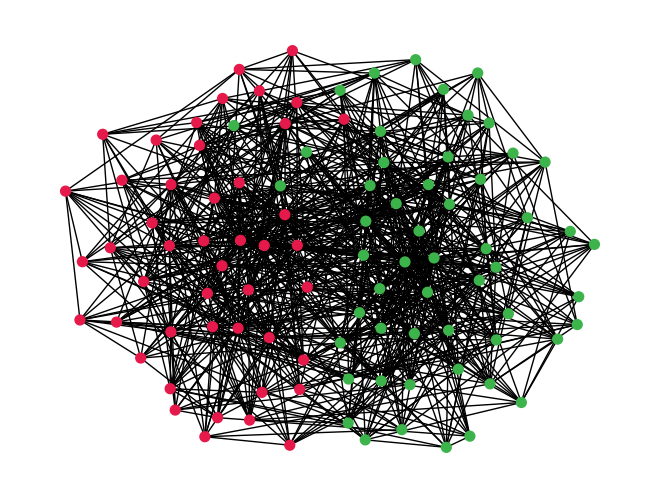

In [7]:
native_class_probs = [1/2, 1/2]  # using balanced class probs
n = 5000  # grow graph to size of 5000 nodes
m = 10  # each node added connects to m other nodes
num_classes = 2  # there are num_classes classes

# tanh setting for degree-varying assortativity
tau = 15
tanh_inter_intra_link_probs = {k: {1: np.tanh(k/tau), 0: 1 - np.tanh(k/tau)} for k in range(100000)}

G, node_degrees, node_labels, intra_class, inter_class = model.generate_graph(
    n=n,
    m=m,
    num_classes=num_classes,
    native_class_probs=native_class_probs,
    inter_intra_link_probs=tanh_inter_intra_link_probs
)

# plot the degree distribution and count of intra/inter-class edges
print(dataset_summary.test_degree_distribution([d for n, d in nx.degree(G)]))
ctr = Counter([d for n, d in nx.degree(G)])
degs = sorted(ctr.items())
plt.loglog([deg for (deg, ct) in degs], 
           [ct for (deg, ct) in degs], 
           label=r'Intra-class ratio: {:.2f} ($\tau$ = {}) '.format(intra_class / (inter_class + intra_class), tau))
print('Theoretical intra-class ratio:', model.get_theoretical_intra_class_estimates(
    inter_intra_link_probs=tanh_inter_intra_link_probs,
    native_class_probs=native_class_probs,
    m=m)
)
plt.xlabel('Degree', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.legend()
plt.show()

# plot label homophily varying over degrees
dataset_summary.plot_degree_label_assortativity(G, node_labels)

# plot a small snapshot of the graph generation itself (for efficiency reasons)
G_s, _, node_labels_s, _, _ = model.generate_graph(
    n=100,
    m=m,
    num_classes=num_classes,
    native_class_probs=native_class_probs,
    inter_intra_link_probs=tanh_inter_intra_link_probs
)
plt.figure()
dataset_summary.draw_network_with_labels(G=G_s, node_labels=node_labels_s)

## Degree-varying, low assortativity (|C| = 2)

100%|██████████| 5000/5000 [00:23<00:00, 214.92it/s]


Calculating best minimal value for power law fit
(2.9863956760845944, 19.0)
Theoretical intra-class ratio: 0.15815221546631128


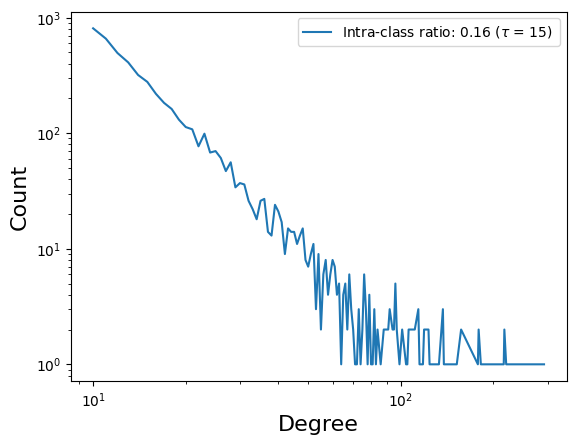

100%|██████████| 100/100 [00:00<00:00, 4122.17it/s]


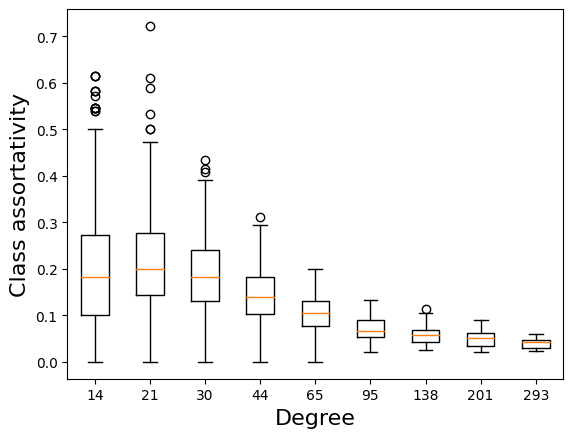

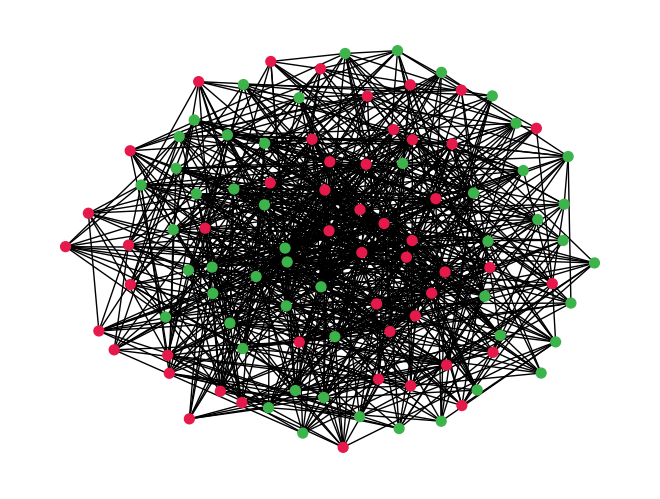

In [9]:
native_class_probs = [1/2, 1/2]  # using balanced class probs
n = 5000  # grow graph to size of 5000 nodes
m = 10  # each node added connects to m other nodes
num_classes = 2  # there are num_classes classes

# tanh setting for degree-varying assortativity
tau = 15
tanh_inter_intra_link_probs = {k: {1: 1 - np.tanh(k/tau), 0: np.tanh(k/tau)} for k in range(100000)}

G, node_degrees, node_labels, intra_class, inter_class = model.generate_graph(
    n=n,
    m=m,
    num_classes=num_classes,
    native_class_probs=native_class_probs,
    inter_intra_link_probs=tanh_inter_intra_link_probs
)

# plot the degree distribution and count of intra/inter-class edges
print(dataset_summary.test_degree_distribution([d for n, d in nx.degree(G)]))
ctr = Counter([d for n, d in nx.degree(G)])
degs = sorted(ctr.items())
plt.loglog([deg for (deg, ct) in degs], 
           [ct for (deg, ct) in degs], 
           label=r'Intra-class ratio: {:.2f} ($\tau$ = {}) '.format(intra_class / (inter_class + intra_class), tau))
print('Theoretical intra-class ratio:', model.get_theoretical_intra_class_estimates(
    inter_intra_link_probs=tanh_inter_intra_link_probs,
    native_class_probs=native_class_probs,
    m=m)
)
plt.xlabel('Degree', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.legend()
plt.show()

# plot label homophily varying over degrees
dataset_summary.plot_degree_label_assortativity(G, node_labels)

# plot a small snapshot of the graph generation itself (for efficiency reasons)
G_s, _, node_labels_s, _, _ = model.generate_graph(
    n=100,
    m=m,
    num_classes=num_classes,
    native_class_probs=native_class_probs,
    inter_intra_link_probs=tanh_inter_intra_link_probs
)
plt.figure()
dataset_summary.draw_network_with_labels(G=G_s, node_labels=node_labels_s)

## Degree-varying, high assortativity (|C| = 3)

100%|██████████| 10000/10000 [01:29<00:00, 111.35it/s]


Calculating best minimal value for power law fit
(3.017974653815227, 34.0)
Theoretical intra-class ratio: 0.9682008727653802


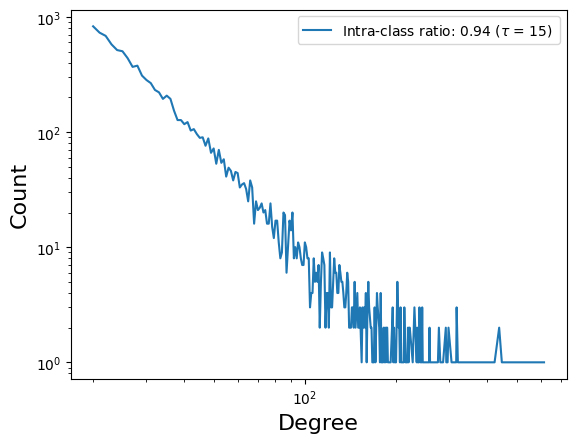

100%|██████████| 100/100 [00:00<00:00, 3399.39it/s]


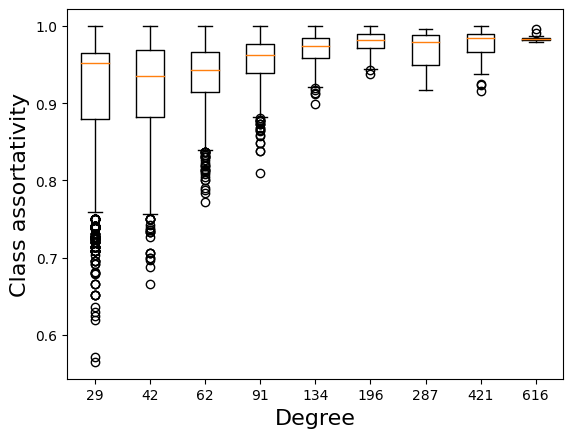

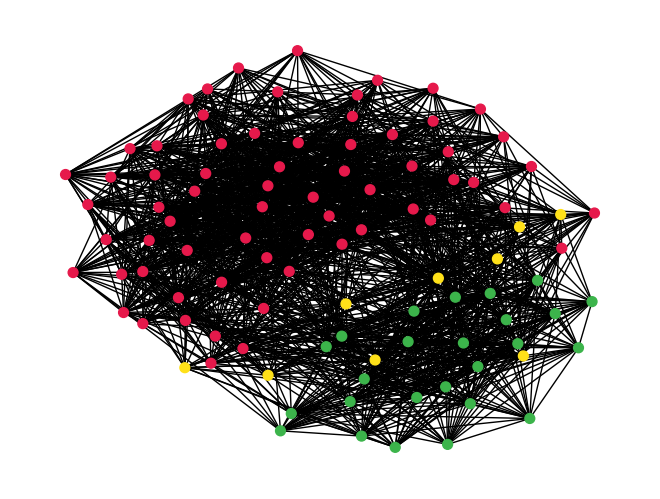

In [10]:
native_class_probs = [2/3, 1/6, 1/6]  # using suitable multinomial parameters for the 3-class case as discussed on page 5
n = 10000  # grow graph to size of 10000 nodes
m = 20  # each node added connects to m other nodes
num_classes = 3  # there are c classes

# tanh setting for degree-varying assortativity
tau = 15
tanh_inter_intra_link_probs = {k: {1: np.tanh(k/tau), 0: 1 - np.tanh(k/tau)} for k in range(100000)}

G, node_degrees, node_labels, intra_class, inter_class = model.generate_graph(
    n=n,
    m=m,
    num_classes=num_classes,
    native_class_probs=native_class_probs,
    inter_intra_link_probs=tanh_inter_intra_link_probs
)

# plot the degree distribution and count of intra/inter-class edges
print(dataset_summary.test_degree_distribution([d for n, d in nx.degree(G)]))
ctr = Counter([d for n, d in nx.degree(G)])
degs = sorted(ctr.items())
plt.loglog([deg for (deg, ct) in degs], 
           [ct for (deg, ct) in degs], 
           label=r'Intra-class ratio: {:.2f} ($\tau$ = {}) '.format(intra_class / (inter_class + intra_class), tau))
print('Theoretical intra-class ratio:', model.get_theoretical_intra_class_estimates(
    inter_intra_link_probs=tanh_inter_intra_link_probs,
    native_class_probs=native_class_probs,
    m=m)
)
plt.xlabel('Degree', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.legend()
plt.show()

# plot label homophily varying over degrees
dataset_summary.plot_degree_label_assortativity(G, node_labels)

# plot a small snapshot of the graph generation itself (for efficiency reasons)
G_s, _, node_labels_s, _, _ = model.generate_graph(
    n=100,
    m=m,
    num_classes=num_classes,
    native_class_probs=native_class_probs,
    inter_intra_link_probs=tanh_inter_intra_link_probs
)
plt.figure()
dataset_summary.draw_network_with_labels(G=G_s, node_labels=node_labels_s)

## Simulating class-conditional features for a given graph

In [11]:
# Although CABAM incorporates class-conditional feature assignment as part of the generative process, it is possible
# to generate node features after graph generation and class assignment is complete, since the features themselves do
# not influence graph formation independent of their class.

n_nodes_in_G = len(G)
n_classes_in_G = len(np.unique(node_labels))
print('Number of nodes in G:', n_nodes_in_G)
print('Class identifiers in G:', n_classes_in_G)

# Example class-conditional feature generation
feature_means = np.eye(n_classes_in_G)
node_features = []
for n_id, c_id in zip(range(len(G)), node_labels):
    f = np.random.multivariate_normal(mean=feature_means[c_id, :],
                                      cov=feature_means,
                                      size=1)
    node_features.append(f.ravel())

node_features = np.array(node_features)

print('Generated feature matrix of shape:', node_features.shape)

Number of nodes in G: 10000
Class identifiers in G: 3
Generated feature matrix of shape: (10000, 3)
